In [44]:
%matplotlib inline

import seaborn as sns
import pickle

import numpy as np
import scipy as sp
import nibabel as nib
import pandas as pd
import cv2
import numpy.ma as ma
import skimage

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from scipy import misc
from scipy.cluster.hierarchy import dendrogram
from scipy import ndimage
from scipy import signal
from sklearn.datasets import load_iris
from scipy import stats
from collections import Counter
from skimage import data
from skimage.filters import try_all_threshold



from sklearn import datasets
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.metrics import silhouette_samples, silhouette_score


sns.set(font_scale=1.4)
sns.set_style("whitegrid", {'axes.grid' : False})

In [45]:
nibfile = nib.load("/Users/hanam/Documents/tract_clustering_3/C1/Volume4D_sym_cleaned.nii.gz")
data = nibfile.get_data()
mask= nib.load("/Users/hanam/Documents/Tracts_testing_2/all_levels/C1/C1_mask.nii.gz")
maskdata= mask.get_data()

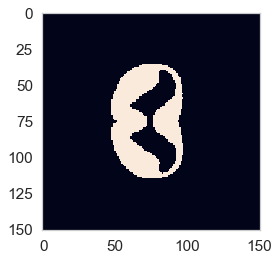

In [46]:
img= plt.imshow(maskdata)

In [47]:
np.sum(maskdata[...])

2330.0

In [48]:
maskdata= np.rot90(maskdata, 1, (1,0))

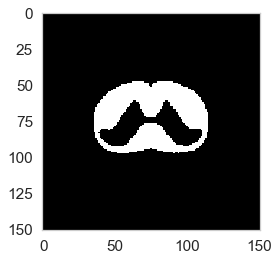

In [49]:
plt.imshow(maskdata, cmap="gray")

In [50]:
data.shape

(151, 151, 1, 6)

In [51]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [52]:
feature_names = [
    "number_axons",
    "axon_equiv_diameter",
    "avf",
    "g_ratio",
    "myelin_thickness",
    "mvf",
]

In [53]:
data = data.transpose((1, 0, 2, 3))

# Ignore solidity, eccent., orient., etc.
#data = data[..., 0:6]
data = data.squeeze(axis=2)

In [54]:
original_shape = data.shape[0:2]

print original_shape

(151, 151)


In [55]:
h1= 35
h2= 115
w1= 35
w2= 120

In [56]:
# for i in range(151):
#     for j in range(151):
#         if data.any[i,j]==0:
#             data[i,j]= numpy.nan

In [57]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

In [58]:
data.shape

(151, 151, 6)

In [59]:
mask.shape

(151, 151)

In [60]:
# for aa in range(1, data.shape[2]+1):
#         metric_tmp= np.squeeze(data[..., aa])
#         features[aa,...]= metric_tmp[maskdata[...].astype(int)] 

In [61]:
np.set_printoptions(threshold=np.inf)

In [62]:
np.sum(maskdata)

2330.0

In [63]:
for i in range(1, data.shape[2]+1):
    
    #image= np.where(maskdata, data[...,i-1], 0)
    data[..., i-1]= np.where(np.sum(maskdata), data[..., i-1], 0)
    im_crop= crop_center(data[..., i-1], w2-w1, h2-h1)
    print data.shape
    

(151, 151, 6)
(151, 151, 6)
(151, 151, 6)
(151, 151, 6)
(151, 151, 6)
(151, 151, 6)


In [64]:
features=np.zeros((data.shape[2],np.sum(maskdata[...].astype(int))))

In [65]:
features.shape

(6, 2330)

In [66]:
for i in range(0, data.shape[2]):
    metric_tmp= np.squeeze(data[...,i])
    metric_tmp= np.where(np.sum(maskdata), metric_tmp, 0)
    print metric_tmp.shape
    features[i,...]= np.sum(metric_tmp)

(151, 151)
(151, 151)
(151, 151)
(151, 151)
(151, 151)
(151, 151)


In [67]:
features.shape

(6, 2330)

In [68]:
features= np.transpose(features)

In [69]:
features.shape

(2330, 6)

In [70]:
features

array([[6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 7.61793335e+02],
       [6.32956125e+05, 4.02003369e+03, 5.37245361e+02, 2.12655908e+03,
        1.44474146e+03, 

(151, 151, 6)
0.0 470.66272
(151, 151, 6)
0.0 1.9206579
(151, 151, 6)
0.0 0.25765193
(151, 151, 6)
0.0 0.7223999
(151, 151, 6)
0.0 0.61736715
(151, 151, 6)
0.0 0.39264792


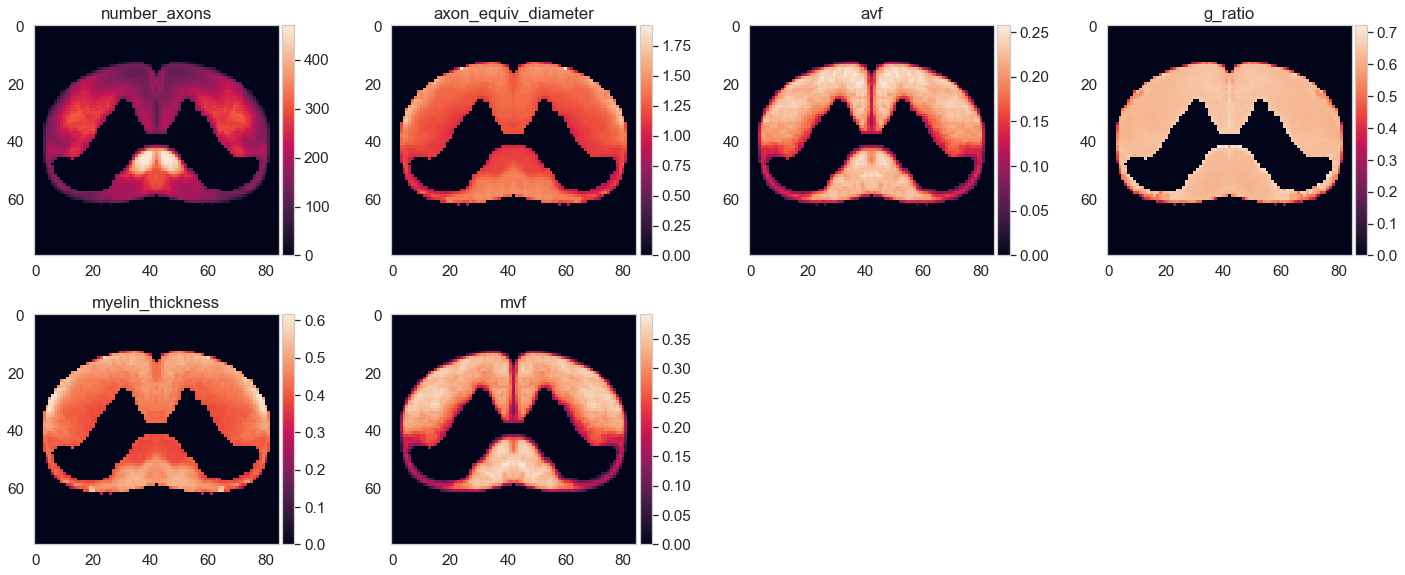

In [71]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, data.shape[2]+1):
    
    #image= np.where(maskdata, data[...,i-1], 0)
    data[..., i-1]= np.where(maskdata, data[..., i-1], 0)
    im_crop= crop_center(data[..., i-1], w2-w1, h2-h1)
    print data.shape
    print data[..., i-1].min(), data[..., i-1].max()
    
    ax = fig.add_subplot(5, 4, i)
    
    #ndimage.median_filter(data,size=20)
    
    #signal.medfilt(data, 5)
    #im_crop[i , ...]= im_crop(mask[...])

           
    img = ax.imshow(im_crop)
    
   
    # Center line
    #ax.axvline(original_shape[1] // 2) 
    plt.title(feature_names[i-1])
    colorbar(img)

plt.tight_layout(h_pad=1)

In [35]:
connectivity = grid_to_graph(n_x=data.shape[0],
                             n_y=data.shape[1])

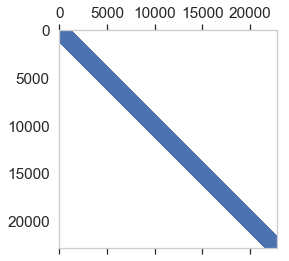

In [36]:
plt.spy(connectivity)

In [37]:
connectivity

<22801x22801 sparse matrix of type '<type 'numpy.int64'>'
	with 113401 stored elements in COOrdinate format>

In [38]:
data.shape

(151, 151, 6)

In [40]:
data= data.reshape(-1, data.shape[2])

In [41]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [42]:
data.shape

(22801, 6)

# t-SNE

In [699]:
data_embedded = TSNE(n_components=2, verbose=3, perplexity=40).fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 22801 samples in 0.582s...
[t-SNE] Computed neighbors for 22801 samples in 4.858s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22801
[t-SNE] Computed conditional probabilities for sample 2000 / 22801
[t-SNE] Computed conditional probabilities for sample 3000 / 22801
[t-SNE] Computed conditional probabilities for sample 4000 / 22801
[t-SNE] Computed conditional probabilities for sample 5000 / 22801
[t-SNE] Computed conditional probabilities for sample 6000 / 22801
[t-SNE] Computed conditional probabilities for sample 7000 / 22801
[t-SNE] Computed conditional probabilities for sample 8000 / 22801
[t-SNE] Computed conditional probabilities for sample 9000 / 22801
[t-SNE] Computed conditional probabilities for sample 10000 / 22801
[t-SNE] Computed conditional probabilities for sample 11000 / 22801
[t-SNE] Computed conditional probabilities for sample 12000 / 22801
[t-SNE] Computed conditional probabilities for sa

In [451]:
num_clusters = 7
clustering = AgglomerativeClustering(linkage= "ward", n_clusters= num_clusters)
clustering.fit(features)
labels = clustering.labels_

#silhouette= silhouette_score(data, labels)

In [452]:
labels.shape

(2330,)

In [453]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [421]:
labels= maskdata[labels]


IndexError: arrays used as indices must be of integer (or boolean) type

In [420]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.,

In [418]:
labels.shape

(2330, 151)

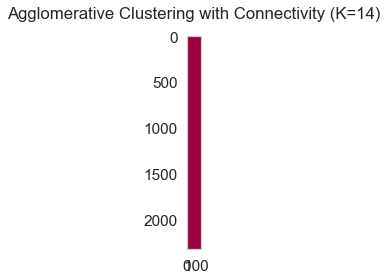

In [419]:
plt.imshow(labels, cmap="Spectral")
plt.title("Agglomerative Clustering with Connectivity (K={})".format(num_clusters), pad=18)
plt.tight_layout()

In [355]:
# plt.figure(figsize=(12, 8))
# plt.scatter(data_embedded[:, 0], data_embedded[:, 1],
#             cmap="Spectral", s=10, c=clustering.labels_)
# plt.title("t-SNE without spatial information")
# plt.show()

NameError: name 'data_embedded' is not defined

<Figure size 864x576 with 0 Axes>

In [360]:
result= np.zeros(metric_tmp.shape, "uint8")

In [361]:
result.shape

(151, 151)

In [363]:
result[maskdata]= labels

IndexError: arrays used as indices must be of integer (or boolean) type

In [357]:
data.shape

(151, 151, 6)

In [358]:
silhouette

0.95307076

In [359]:
labels = labels.reshape(*original_shape)

ValueError: cannot reshape array of size 2330 into shape (151,151)

In [705]:
labels.shape

(151, 151)

In [706]:
## Plot Dendogram

#This example plots the corresponding dendrogram of a hierarchical clustering
#using AgglomerativeClustering and the dendrogram method available in scipy.


# def plot_dendrogram(model, **kwargs):

#     # Children of hierarchical clustering
#     children = model.children_

#     # Distances between each pair of children
#     # Since we don't have this information, we can use a uniform one for plotting
#     distance = np.arange(children.shape[0])

#     # The number of observations contained in each cluster level
#     no_of_observations = np.arange(2, children.shape[0]+2)

#     # Create linkage matrix and then plot the dendrogram
#     linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# x = iris.data[:20]
# model = AgglomerativeClustering(n_clusters=3)

# model = model.fit(x)
# plt.title('Hierarchical Clustering Dendrogram')
# plot_dendrogram(model, labels=model.labels_)
# plt.show()

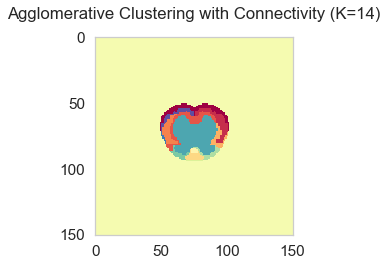

In [707]:
plt.imshow(labels, cmap="Spectral")
plt.title("Agglomerative Clustering with Connectivity (K={})".format(num_clusters), pad=18)
plt.tight_layout()

In [116]:
# plot_dendrogram(clustering)
# plt.show()

In [113]:
data.shape

(22801, 6)

In [89]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, 26):
    clustering = SpectralClustering(n_clusters=i+4)
                                        
    clustering.fit(data, connectivity)
    labels = clustering.labels_
    silhouette= silhouette_score(data, labels)
    print silhouette
#     print clustering.n_components_
#     print clustering.children_
#     print clustering.n_leaves_

#     plot_dendrogram(clustering)
#     plt.show()
    
    
#     plt.scatter(data_embedded[:, 0], data_embedded[:, 1],
#         cmap="Spectral", s=10, c=clustering.labels_)
#     plt.title("t-SNE without spatial information")
#     plt.show()

    labels = labels.reshape(*original_shape)    
    im_crop= crop_center(labels, w2-w1, h2-h1)

    ax = fig.add_subplot(5, 5, i)
    img = ax.imshow(im_crop, cmap="Spectral")
    plt.title("Clusters = {}".format(i+4), pad=18)
    plt.tight_layout()
    

plt.suptitle("Spectral Clustering with Connectivity, different cluster numbers from 5 to 29")
plt.tight_layout(h_pad=1)

KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

In [114]:
x= stats.mode(data)
# y= stats.mode(connectivity)

In [118]:
a= np.bincounts(data)
print np.argmax(a)

AttributeError: 'module' object has no attribute 'bincounts'

In [162]:
a= Counter(data[2])
print a.most_common(22)

[(-0.3166395, 1), (-0.3389006, 1), (-0.34001783, 1), (-0.32331488, 1), (-0.3282021, 1), (-0.339248, 1)]


In [115]:
print(x)

ModeResult(mode=array([[-0.3166395 , -0.3389006 , -0.3282021 , -0.34001783, -0.339248  ,
        -0.32331488]], dtype=float32), count=array([[20416, 20416, 20416, 20416, 20416, 20416]]))


In [351]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)


for i in range(1, 26):
    clustering = KMeans(n_clusters=i+4)
                                        
    clustering.fit(data)
    labels = clustering.labels_ 
    
#     silhouette= silhouette_score(data, labels)
#     print silhouette
#     print clustering.n_components_
#     print clustering.children_
#     print clustering.n_leaves_

#     plot_dendrogram(clustering)
#     plt.show()
    
    
#     plt.scatter(data_embedded[:, 0], data_embedded[:, 1],
#         cmap="Spectral", s=10, c=clustering.labels_)
#     plt.title("t-SNE without spatial information")
#     plt.show()

    labels = labels.reshape(*original_shape) 
#     a= Counter(labels[1])
#     print a.most_common(1)
    
    im_crop= crop_center(labels, w2-w1, h2-h1)

    ax = fig.add_subplot(5, 5, i)
    img = ax.imshow(im_crop, cmap="Spectral")
    plt.title("Clusters = {}".format(i+4), pad=18)
    plt.tight_layout()
    

plt.suptitle("K-Means Clustering with Connectivity, different cluster numbers from 5 to 29")
plt.tight_layout(h_pad=1)

ValueError: cannot reshape array of size 2330 into shape (151,151)

<Figure size 1440x1440 with 0 Axes>